In [ ]:
import scipy.optimize as optimize
import numpy as np

def func(x):
    return np.cos(x)**2 + 6 - x

# 0<=cos(x)**2<=1, so the root has to be between x=6 and x=7
print(optimize.bisect(func, 6, 7))
# 6.77609231632

In [47]:
import numpy as np
from scipy.interpolate import interpn
import matplotlib.pyplot as plt

from model_config import all_players
from wiggling import interpolate

datas = [np.load(f"{p}_means.npy") for p in all_players][3:]
surfaces = [interpolate(d, res=100) for d in datas]
constant = 3
discrete = np.arange(1, 11)
X = np.linspace(1, 10, 100)


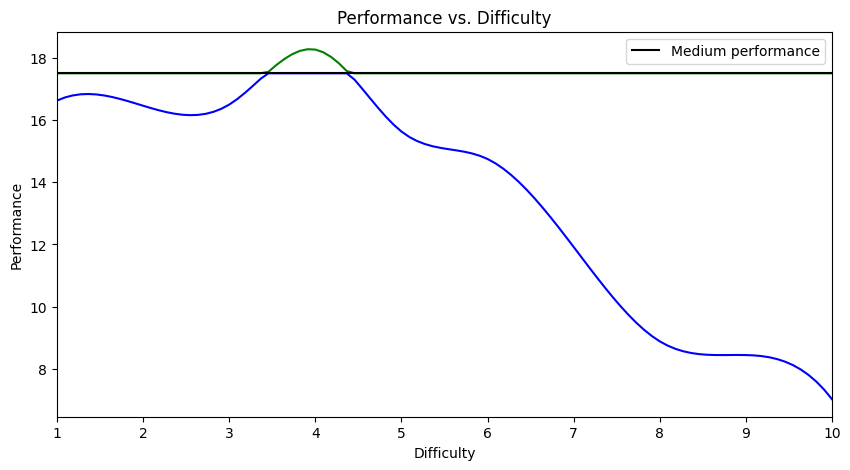

In [48]:
line = np.column_stack((X, np.full_like(X, constant)))
performances = [interpn((discrete, discrete), d, line, "cubic") for d in datas]
def plot_performace(medium, upper, lower):
    plt.figure(figsize=(10, 5))
    plt.plot(X, upper, color="g")
    plt.plot(X, lower, color="b")

    plt.axhline(medium, color='k', label='Medium performance')

    plt.xlim(1, 10)
    plt.xlabel('Difficulty')
    plt.ylabel('Performance')
    plt.title('Performance vs. Difficulty')
    plt.legend()
    plt.show()

target = 17.5
# target = 10
Y = np.mean(performances, axis=0)
upper = np.clip(Y, target, 100)
lower = np.clip(Y, 0, target)
plot_performace(target, upper, lower)

x values where sin(x) intersects y=0.5: []


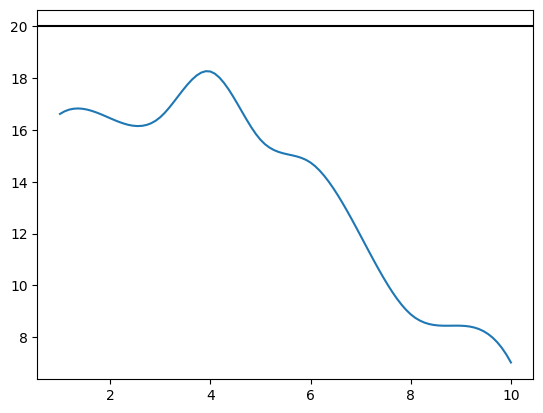

In [63]:
def get_x(target, Y):
    crossings = np.where(np.diff(np.sign(Y - target)))[0]

    # Interpolate to find more precise intersection points
    x_intersections = []
    for crossing in crossings:
        x0, x1 = X[crossing : crossing + 2]
        y0, y1 = Y[crossing : crossing + 2]
        x_intersections.append(x0 + (target - y0) * (x1 - x0) / (y1 - y0))

    return x_intersections

target = 20
x_intersections = get_x(target, Y)
print("x values where sin(x) intersects y=0.5:", x_intersections)
plt.plot(X, Y)
plt.axhline(target, color='k', label='Target value')
for x_intersection in x_intersections:
    plt.axvline(x_intersection, color='r', linestyle='--')


fsolve
bisect